In [ ]:
!pip install fastf1

In [ ]:
import fastf1
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np

In [ ]:
# Load the data
session = fastf1.get_session(2023, 'Singapore', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()   # Gear line
pos = lap.get_pos_data()    # Black line
circuit_info = session.get_circuit_info()

Plotting the track shape and the corners

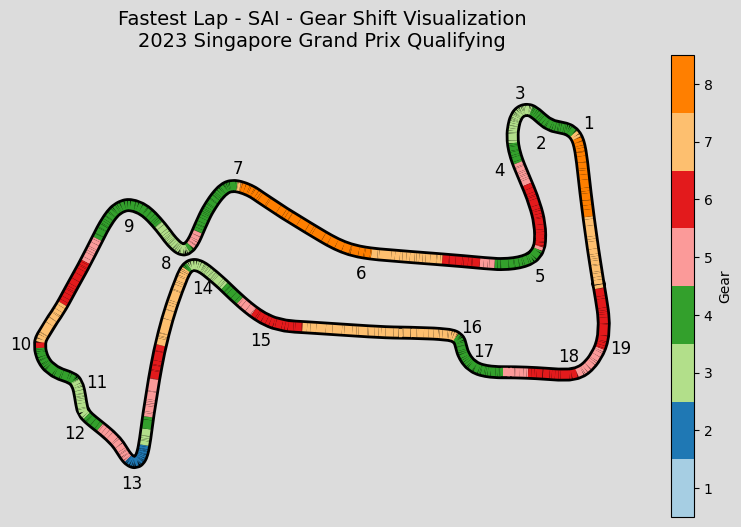

In [ ]:
        # For plotting the GEAR line:
# Where the car is at any moment in time ('x' n 'y' are columns in telemetry)
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

# Create points, and with them, segments (converting it to the appropriate numpy data types)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

# Create a line collection (coloring the shape track). Set a segmented colormap and normalize the plot to integer values of colormap
colors = plt.get_cmap('Paired')
line_col = LineCollection(segments, norm=plt.Normalize(1, colors.N+1), cmap=colors, linewidth=6)
line_col.set_array(gear)

        # For plotting the BLACK line:
# By matrix multiplication of the rotation matrix with a vector [x, y], a new rotated vector [x_rot, y_rot] is obtained.
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])

    return np.matmul(xy, rot_mat)

# Get the coordinates: an array of shape [n, 2] where n is the number of points and the second axis is x and y
track = pos.loc[:, ('X', 'Y')].to_numpy()

'''=================================='''

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='gainsboro')
plt.title(f"Fastest Lap - {lap['Driver']} - Gear Shift Visualization\n"
          f"{session.event.year} {session.event['EventName']} {session.name}", size=14)

# Add a solid black line around the circuit
plt.plot(track[:, 0], track[:, 1], color='black', linewidth=10)

# Add the collection of lines (gear lines) to represent the circuit
ax.add_collection(line_col)

# CORNERS
# 1-Length of the space between number and track
offset_vector = [500, 0]

# 2-Iterate over all corners
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Finally, PRINT THE CORNER NUMBER.
    plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='large', color='black')

# Axes settings
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.axis('off')

# Add a colorbar to the plot. Change orientation depending on the track
lateral_bar = plt.colorbar(mappable=line_col, label="Gear", boundaries=np.arange(1, 10), orientation="vertical")   #or horizontal
lateral_bar.set_ticks(np.arange(1.5, 9.5))
lateral_bar.set_ticklabels(np.arange(1, 9))

#plt.savefig(f"/content/drive/MyDrive/F1/Gear_Shift_Visualization.png", dpi=500)

plt.show()